# Capstone Project Two: Flipkart Data Exploration

## Section 1: Imports and Data Load

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# Load cleaned CSV
file_path = "flipkart_cleaned_lite_v9.csv"
df = pd.read_csv(file_path)

# Preview data
df.head()

,uniq_id,product_name,brand,retail_price,discounted_price,product_category_tree,product_url,description,product_rating,overall_rating,image,pid,is_FK_Advantage_product,crawl_year,crawl_month,crawl_hour,crawl_minute,crawl_ampm,crawl_weekday
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,Alisha,999.0,379.0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",http://www.flipkart.com/alisha-solid-women-s-c...,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"[""http://img5a.flixcart.com/image/short/u/4/a/...",SRTEH2FF9KEDEFGF,False,2016,3,22,59,PM,Friday
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor,32157.0,22646.0,"[""Furniture >> Living Room Furniture >> Sofa B...",http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",SBEEH3QGU7MFYJFY,False,2016,3,22,59,PM,Friday
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,AW,999.0,499.0,"[""Footwear >> Women's Footwear >> Ballerinas >...",http://www.flipkart.com/aw-bellies/p/itmeh4grg...,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",SHOEH4GRSUBJGZXE,False,2016,3,22,59,PM,Friday
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,Alisha,699.0,267.0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",http://www.flipkart.com/alisha-solid-women-s-c...,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"[""http://img5a.flixcart.com/image/short/6/2/h/...",SRTEH2F6HUZMQ6SJ,False,2016,3,22,59,PM,Friday
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,Sicons,220.0,210.0,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",http://www.flipkart.com/sicons-all-purpose-arn...,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"[""http://img5a.flixcart.com/image/pet-shampoo/...",PSOEH3ZYDMSYARJ5,False,2016,3,22,59,PM,Friday


## Section 2: Data Cleansing
- Cleaned using a custom Python script outside this notebook
- Extracted structured `product_specifications` from messy JSON
- Dropped columns with <70% non-null values
- Converted `crawl_timestamp` into:
    - `crawl_year`, `crawl_month`, `crawl_hour`, `crawl_minute`, `crawl_ampm`, `crawl_weekday`
- Originally added top 50 most frequent product spec columns (prefix: `spec_`),
  but these were dropped due to insufficient data
- Typed numeric and boolean fields appropriately

## Section 3: Issues (from Issue Tree)
### I. Temporal Trends (When are the discounts?)
- Hour of day
- AM vs PM
- Day of week
- Weekend vs weekday

### II. Category Impact (Who benefits from discounts?)
- Product categories
- Brand-level comparison
- Flipkart Advantage products

### III. Discount Behavior (How deep are the discounts?)
- Overall average discount percentage
- Distribution of discount levels
- Outlier detection and patterns


## Section 4: Feature Engineering

In [49]:
# Calculate discount percentage
df['discount_pct'] = ((df['retail_price'] - df['discounted_price']) / df['retail_price']) * 100

# Filter out nonsensical discount values (optional)
df = df[(df['discount_pct'] >= 0) & (df['discount_pct'] <= 100)]

## Section 5: Univariate Visualizations

### Distribution of Discount %

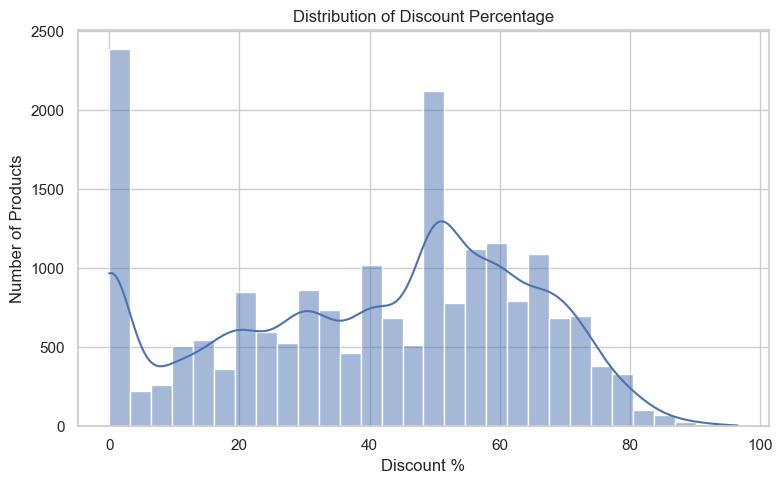

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(df['discount_pct'], bins=30, kde=True)
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount %")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()

**Audience Notes:**
- Executive: Consider using a simplified version of this chart to highlight the most common discount range.
- Technical: Show full distribution with KDE to examine skew and outliers.
- Non-Technical: Replace with a bar chart showing 3–4 discount ranges (e.g. 0–20%, 21–40%, etc.).

### Average Discount by Hour

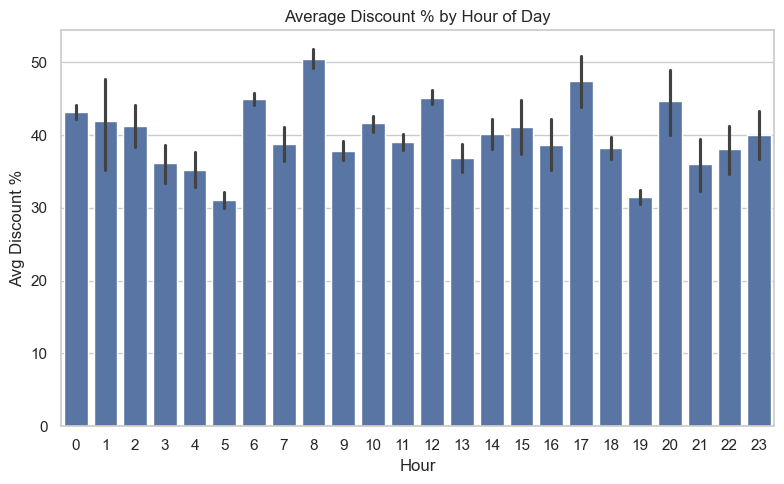

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(x='crawl_hour', y='discount_pct', data=df)
plt.title("Average Discount % by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Discount %")
plt.tight_layout()
plt.show()

**Audience Notes:**
- Executive: Consider simplifying this chart into a comparison of morning vs evening hours.
- Technical: Use this chart to support hourly trend discussions.
- Non-Technical: Focus only on peak discount hours (e.g., top 3) with clearer labels.

### Top Categories by Avg Discount %

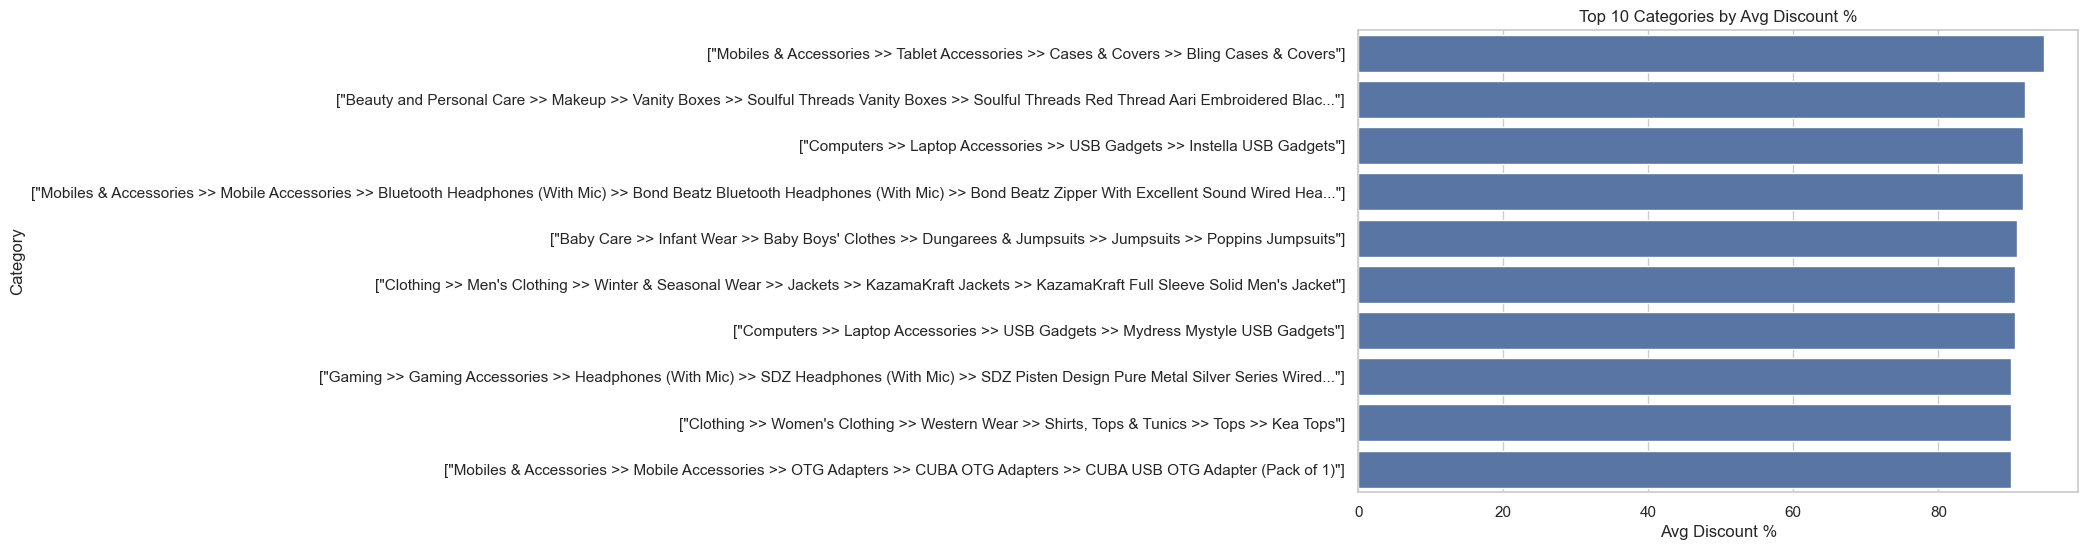

In [61]:
if 'product_category_tree' in df.columns:
    category_discount = df.groupby('product_category_tree')['discount_pct'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_discount.values, y=category_discount.index)
    plt.title("Top 10 Categories by Avg Discount %")
    plt.xlabel("Avg Discount %")
    plt.ylabel("Category")
    plt.subplots_adjust(left=0.3)
    plt.show()

**Audience Notes:**
- Executive: Useful as-is for showing high-level categories receiving large discounts.
- Technical: May expand with confidence intervals or sample sizes.
- Non-Technical: Consider truncating category names or showing only top 5.

## Section 6: Bivariate Visualizations (Two-Variable Analysis)

### Discount Percentage by Brand

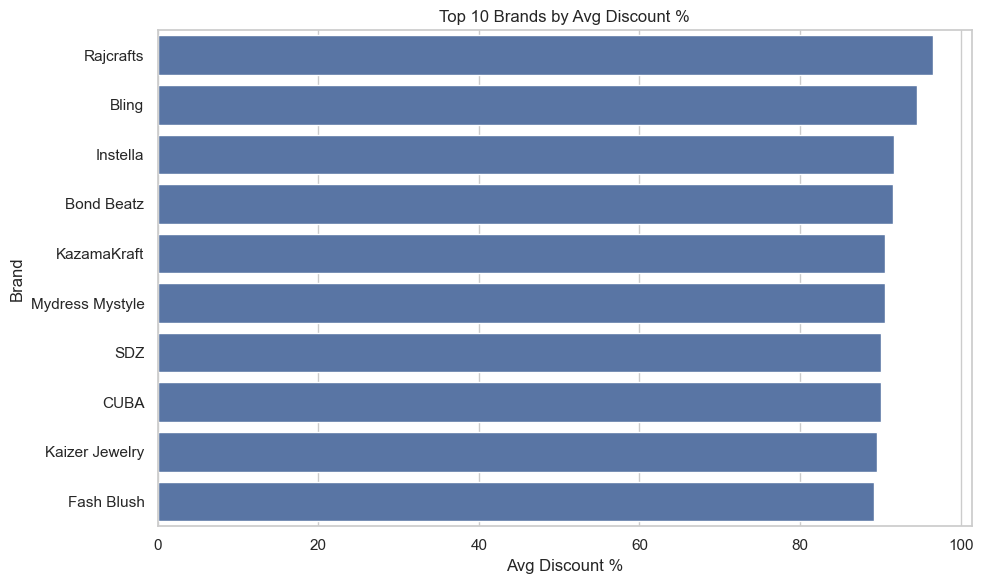

In [68]:
brand_discount = df.groupby('brand')['discount_pct'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_discount.values, y=brand_discount.index)
plt.title("Top 10 Brands by Avg Discount %")
plt.xlabel("Avg Discount %")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

**Audience Notes:**
- Executive: Use to highlight brands most likely to participate in discount strategies.
- Technical: Could be expanded to include volume of products or confidence intervals.
- Non-Technical: Consider using simpler labels or combining lesser-known brands.

### Discount Percentage by AM/PM

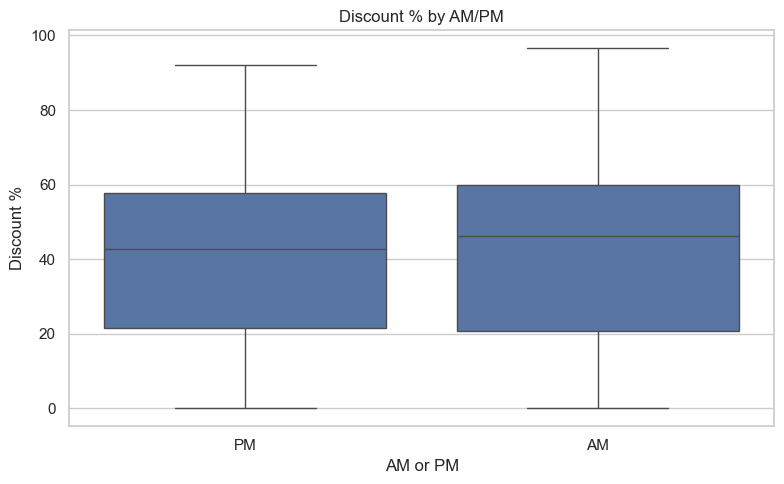

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='crawl_ampm', y='discount_pct', data=df)
plt.title("Discount % by AM/PM")
plt.xlabel("AM or PM")
plt.ylabel("Discount %")
plt.tight_layout()
plt.show()

**Audience Notes:**
- Executive: Could support marketing campaigns optimized by time of day.
- Technical: Useful for validating timing hypotheses related to deal drops.
- Non-Technical: Consider using a bar chart for easier interpretation.

### Flipkart Advantage vs Discount Percentage

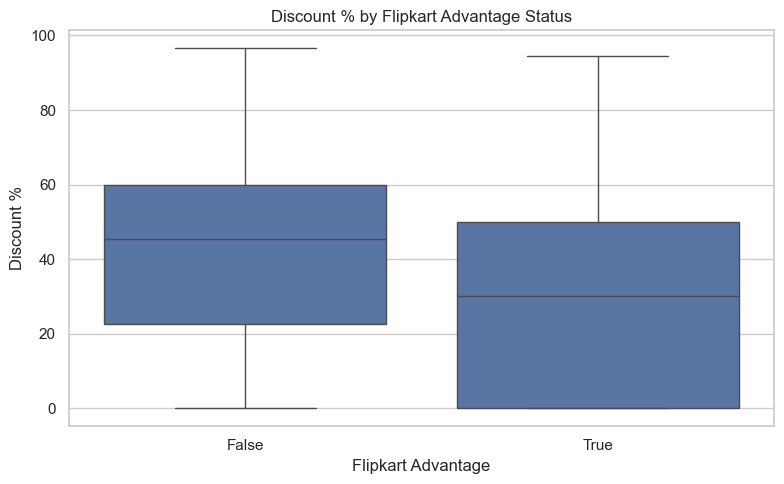

In [76]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_FK_Advantage_product', y='discount_pct', data=df)
plt.title("Discount % by Flipkart Advantage Status")
plt.xlabel("Flipkart Advantage")
plt.ylabel("Discount %")
plt.tight_layout()
plt.show()

**Audience Notes:**
- Executive: This chart may support messaging about preferred seller programs.
- Technical: Useful for comparing central tendency and variability across groups.
- Non-Technical: Consider using a simplified bar chart showing average discount only.


### Discount Percentage by Day of Week

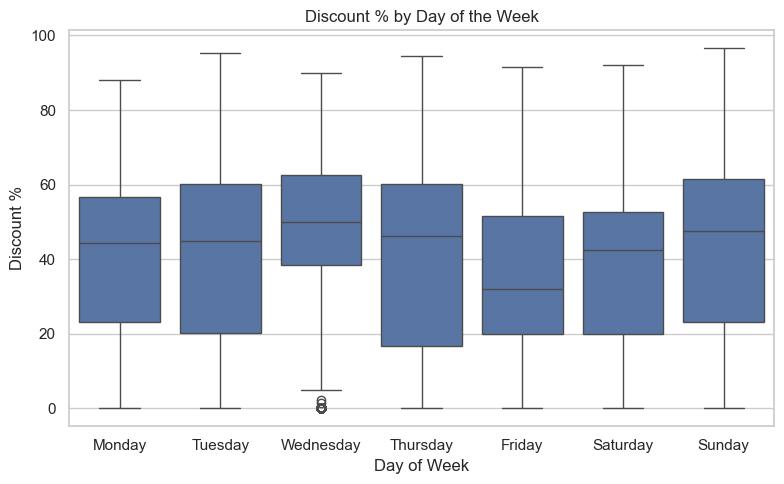

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='crawl_weekday', y='discount_pct', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Discount % by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Discount %")
plt.tight_layout()
plt.show()

**Audience Notes:**
- Executive: Can support decisions about when to launch promotions.
- Technical: Helps assess variability and consistency of discounting behavior.
- Non-Technical: Consider converting to bar chart of average discounts per day.

## Section 7: Multivariate Visualizations (Three or More Variables)


### Discount % by Brand and Advantage Status

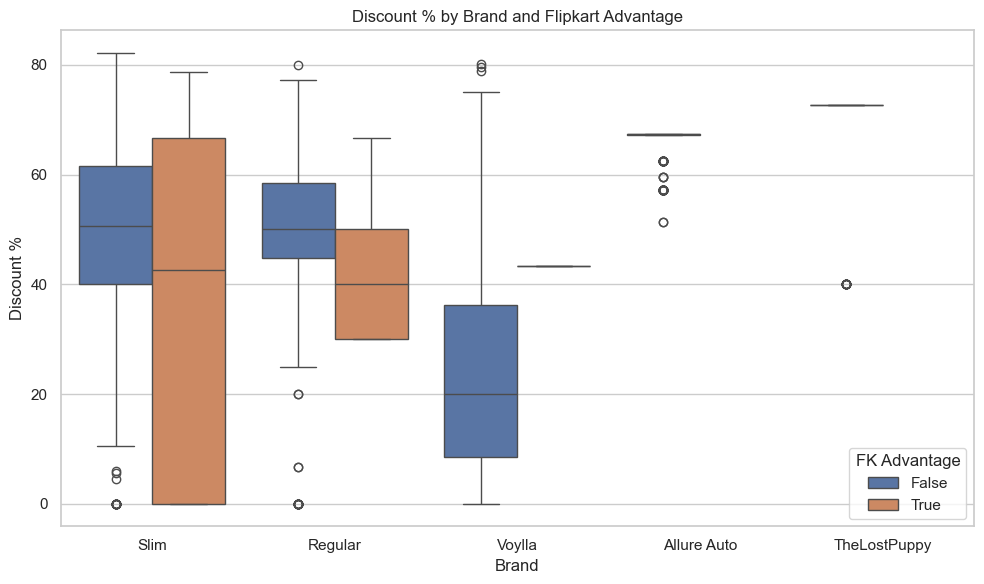

In [87]:
top_brands = df['brand'].value_counts().head(5).index
filtered = df[df['brand'].isin(top_brands)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='discount_pct', hue='is_FK_Advantage_product', data=filtered)
plt.title("Discount % by Brand and Flipkart Advantage")
plt.xlabel("Brand")
plt.ylabel("Discount %")
plt.legend(title='FK Advantage')
plt.tight_layout()
plt.show()

**Audience Notes:**
- Executive: Supports cross-brand decision-making and vendor strategy.
- Technical: Enables exploration of interaction effects.
- Non-Technical: Could be split into separate bar charts for clarity.

### Discount % by Category and Weekday

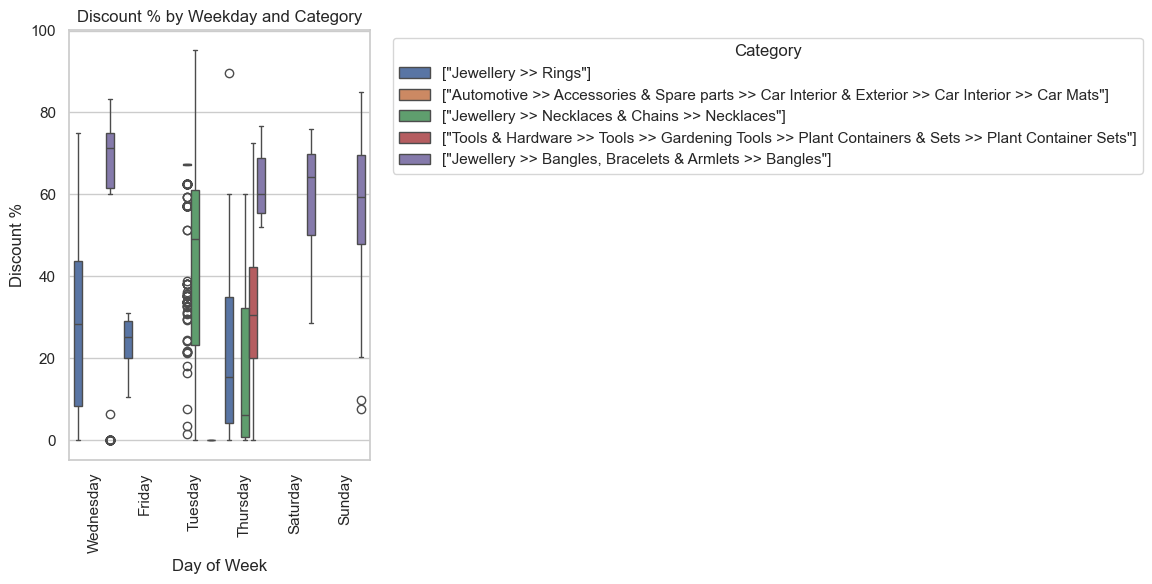

In [116]:
top_cats = df['product_category_tree'].value_counts().head(5).index
cat_df = df[df['product_category_tree'].isin(top_cats)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='crawl_weekday', y='discount_pct', hue='product_category_tree', data=cat_df)
plt.title("Discount % by Weekday and Category")
plt.xlabel("Day of Week")
plt.ylabel("Discount %")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Audience Notes:**
- Executive: Visualizes how discount timing varies by category.
- Technical: Can be used to test interaction hypotheses.
- Non-Technical: May need simplification or stacked bar chart format.

## Section 8: Visuals for Tableau Export

### Recreating Key Python Visuals in Tableau
Below are Python visualizations selected for Tableau export, along with placeholders for `.to_csv()` data preparation if needed.

#### 1. Top 10 Categories by Avg Discount %
- Why: Aligns with key insight on which categories benefit most
- Tableau Value: Clear bar chart or interactive filter
- **Export Prep (commented):**

In [100]:
# category_discount.to_csv("tableau_top_categories_by_discount.csv", index=True)

#### 2. Discount % by Day of Week
- Why: Supports timing decisions for discount campaigns
- Tableau Value: Weekly trend view or calendar-based visualization
- **Export Prep (commented):**

In [103]:
# weekday_discount = df.groupby('crawl_weekday')['discount_pct'].mean()
# weekday_discount.to_csv("tableau_discount_by_weekday.csv")

#### 3. Flipkart Advantage vs Discount %

- Why: Business-level insight into seller program discounts
- Tableau Value: Boxplot or bar comparison
- **Export Prep (commented):**

In [107]:
# fk_advantage_df = df[['is_FK_Advantage_product', 'discount_pct']]
# fk_advantage_df.to_csv("tableau_fk_advantage_discount.csv", index=False)

#### 4. Discount % by Brand and Advantage Status
- Why: Great example of multivariate insight
- Tableau Value: Filterable bar or boxplot with brand overlay
- **Export Prep (commented):**

In [110]:
# top_brands = df['brand'].value_counts().head(5).index
# brand_adv_df = df[df['brand'].isin(top_brands)][['brand', 'is_FK_Advantage_product', 'discount_pct']]
# brand_adv_df.to_csv("tableau_brand_by_fk_advantage_discount.csv", index=False)

### Optional New Tableau Visuals
Below are ideas for new visualizations that can be explored only in Tableau.

#### A. Heatmap: Discount % by Hour + Day of Week
- Multivariate view showing temporal discount behavior

#### B. Interactive Category Drilldown **(Selected as shared interactive visualization)**
- Use Tableau filters to compare discount patterns by product category
- Selected because it’s fast to build, broadly understandable, and valuable for all audiences

#### C. Dashboard KPI Cards
- Quick stats: Avg discount, top category, highest discount brand

## Section 9: Final Dashboard Planning
### Executive Dashboard (High-Level Summary)
- Note: One visualization will be the shared interactive category drilldown built in Tableau and reused across all three dashboards.
  - COVER SLIDE
  - SLIDE 1 - 1 executive summary text only slide
  - SLIDE 2 - Viz 1: Top 10 Categories by Avg Discount % (Recreated in Tableau from Python)
  - SLIDE 3 - Viz 2: Flipkart Advantage vs Discount % (Recreated in Tableau from Python)
  - SLIDE 4 - Viz 3: Discount % by Day of Week (Recreated in Tableau from Python)
  - SLIDE 5 - Viz 4: Discount % by Brand (Recreated in Tableau from Python)
  - SLIDE 6 - Viz 5: Discount % by AM/PM (Recreated in Tableau from Python)
  - SLIDE 7 - Viz 6: Shared Interactive Category Drilldown (Tableau-only)
  - SLIDE 8 - Viz 7: Dashboard KPI Card (Tableau-only)
  - SLIDE 9 - Viz 8: Optional Pie or Stacked Bar (Tableau-only)
  - SLIDE 10 - 1 recap text only slide

### Technical Dashboard (Full Detail)
- Note: One visualization will be the shared interactive category drilldown built in Tableau and reused across all three dashboards.
  - COVER SLIDE
  - SLIDE 1 - 1 problem introduction (including issue tree and executive summary content) text only slide
  - SLIDE 2 - Viz 1: Distribution of Discount % (Reused Python Image)
  - SLIDE 3 - Viz 2: Average Discount by Hour (Recreated in Tableau from Python)
  - SLIDE 4 - Viz 3: Top 10 Categories by Avg Discount % (Recreated in Tableau from Python)
  - SLIDE 5 - Viz 4: Discount % by Day of Week (Recreated in Tableau from Python)
  - SLIDE 6 - Viz 5: Flipkart Advantage vs Discount % (Recreated in Tableau from Python)
  - SLIDE 7 - Viz 6: Discount % by Brand + FK Advantage (Multivariate) (Recreated in Tableau from Python)
  - SLIDE 8 - Viz 7: Discount % by Category + Weekday (Multivariate) (Recreated in Tableau from Python)
  - SLIDE 9 - Viz 8: Shared Interactive Category Drilldown (Tableau-only)
  - SLIDE 10 - 1 recap text only slide

### Non-Technical Dashboard (Plain Language Focus)
- Note: One visualization will be the shared interactive category drilldown built in Tableau and reused across all three dashboards.
  - COVER SLIDE
  - SLIDE 1 - 1 problem introduction  text only slide
  - SLIDE 2 - Viz 1: Top 10 Categories by Avg Discount % (Simplified) (Recreated in Tableau from Python)
  - SLIDE 3 - Viz 2: Flipkart Advantage vs Discount % (Bar Chart) (Recreated in Tableau from Python)
  - SLIDE 4 - Viz 3: Discount % by Day of Week (Simplified Bar) (Recreated in Tableau from Python)
  - SLIDE 5 - Viz 4: Discount % by AM/PM (Rounded Labels) (Recreated in Tableau from Python)
  - SLIDE 6 - Viz 5: Shared Interactive Category Drilldown (Tableau-only)
  - SLIDE 7 - Viz 6: KPI Card (e.g., Avg Discount, Top Brand) (Tableau-only)
  - SLIDE 8 - Viz 7: Optional Stacked Bar by Discount Tier (Tableau-only)
  - SLIDE 9 - Viz 8: Optional Simplified Distribution (3–4 ranges) (Tableau-only)
  - SLIDE 10 - 1 recap text only slide

## Section 10: Insights
### Insight 1: Discount Patterns Vary by Category
- Products in certain categories receive significantly higher average discounts.
- The "Top 10 Categories by Avg Discount %" chart shows a clear concentration of deep discounts in a few product types.
- This suggests Flipkart may prioritize promotions based on product vertical performance.

### Insight 2: Flipkart Advantage Sellers Tend to Offer Higher Discounts
- Products marked as part of the Flipkart Advantage program show a tendency to receive greater discounts.
- The "Flipkart Advantage vs Discount %" boxplot highlights this relationship.
- This may reflect strategic discounting partnerships or fulfillment advantages.

### Insight 3: Discounts Cluster Around Certain Times of Day and Week
- Time-based trends indicate discounts are not uniformly distributed.
- The "Discount % by Day of Week" and "Discount % by AM/PM" charts show that promotions are more likely to appear during key shopping periods (e.g., evenings, weekends).
- Tableau’s interactive drilldown can allow business users to explore how these timing patterns vary by category.

## Section 11: Reflections and Next Steps
What I learned is that having a clear, documented process is essential for a real-world data analysis project. It’s not just about running code — it’s about keeping the purpose in focus and making sure each step is traceable.

If I had more time or access to additional data, I’d focus on diving deeper into statistics, which is an area I want to strengthen. I know that practice will help me feel more confident drawing conclusions from data.

This project supported my learning goals by providing a detailed, real-world framework to follow, and I really appreciated how much guidance Springboard gave to help me succeed.